<a href="https://colab.research.google.com/github/Jiiahhhh/Belajar_TensorFlow/blob/master/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.0 Getting started with TensorFlow: A guide to the fundamentals

### What is TensorFlow?
TensorFlow, ini adalah library machine learning open-source. Library ini menyediakan solusi lengkap untuk pra-pemrosesan data, pemodelan data, dan penyajian model (distribusi model kepada pengguna lain).

### Why use TensorFlow?
Daripada membangun model machine learning dan deep learning dari awal, lebih mungkin Anda akan menggunakan sebuah library seperti TensorFlow. Hal ini karena library tersebut mengandung banyak fungsi machine learning yang paling umum yang mungkin Anda ingin gunakan.

### What we're going to cover
TensorFlow sangat luas. Tetapi premis utamanya sederhana: mengubah data menjadi angka (tensor) dan membangun algoritma machine learning untuk menemukan pola di dalamnya.

Dalam buku catatan ini, kami mencakup beberapa operasi TensorFlow yang paling fundamental, lebih spesifiknya:

* Pengenalan terhadap tensors (membuat tensors)
* Mendapatkan informasi dari tensors (atribut tensors)
* Memanipulasi tensors (operasi tensors)
* Tensors dan NumPy
* Menggunakan @tf.function (cara untuk mempercepat fungsi Python reguler Anda)
* Menggunakan GPU dengan TensorFlow
* Latihan untuk dicoba

Hal-hal yang perlu diperhatikan:
* Banyak dari konvensi di sini akan terjadi secara otomatis di belakang layar (saat Anda membangun sebuah model), tetapi itu layak diketahui sehingga jika Anda melihat salah satu dari hal-hal ini, Anda tahu apa yang terjadi.
* Untuk setiap fungsi TensorFlow yang Anda lihat, penting untuk dapat memeriksanya dalam dokumentasi, misalnya, dengan pergi ke dokumen API Python untuk semua fungsi dan mencari apa yang Anda butuhkan: https://www.tensorflow.org/api_docs/python/ (jangan khawatir jika ini terlihat menakutkan pada awalnya, dengan cukup latihan, Anda akan terbiasa menavigasi dokumentasi).

In [ ]:
# Create timestamp
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-02-20 02:24:51.086060


## Introducing to Tensors
Jika Anda pernah menggunakan NumPy, tensors mirip dengan array NumPy (kita akan melihat lebih banyak tentang ini nanti).

Untuk keperluan buku catatan ini dan ke depannya, Anda dapat menganggap tensor sebagai representasi numerik multi-dimensi (juga disebut sebagai n-dimensional, di mana n dapat menjadi angka apa pun) dari sesuatu. Di mana sesuatu bisa hampir apa saja yang bisa Anda bayangkan:

* Ini bisa berupa angka itu sendiri (menggunakan tensors untuk merepresentasikan harga rumah).
* Ini bisa menjadi gambar (menggunakan tensors untuk merepresentasikan piksel dari sebuah gambar).
* Ini bisa menjadi teks (menggunakan tensors untuk merepresentasikan kata-kata).
* Atau bisa menjadi beberapa bentuk informasi (atau data) lainnya yang ingin Anda representasikan dengan angka.

Perbedaan utama antara tensors dan array NumPy (juga array numerik n-dimensional) adalah bahwa tensors dapat digunakan pada GPU (unit pemrosesan grafis) dan TPU (unit pemrosesan tensor).

Manfaat dari dapat dijalankan pada GPU dan TPU adalah perhitungan yang lebih cepat, ini berarti, jika kita ingin menemukan pola dalam representasi numerik dari data kita, kita umumnya dapat menemukannya lebih cepat menggunakan GPU dan TPU.

Baiklah, sudah cukup pembicaraan tentang tensors, mari kita lihat mereka.

Hal pertama yang akan kita lakukan adalah mengimpor TensorFlow dengan alias umum tf.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating Tensors with tf.constant()
Seperti yang disebutkan sebelumnya, pada umumnya, Anda biasanya tidak akan membuat tensors sendiri. Hal ini karena TensorFlow memiliki modul bawaan (seperti `tf.io` dan `tf.data`) yang dapat membaca sumber data Anda dan secara otomatis mengonversinya menjadi tensors, kemudian nantinya, model jaringan saraf akan memprosesnya untuk kita.

Namun untuk saat ini, karena kita sedang mengenal tensors sendiri dan bagaimana cara memanipulasinya, kita akan melihat bagaimana kita bisa membuatnya sendiri.

Kita akan memulainya dengan menggunakan `tf.constant()`.

In [ ]:
# Buat scalar
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

Sebuah skalar dikenal sebagai tensor peringkat 0. Karena tidak memiliki dimensi (hanya sebuah angka).

>🔑 Catatan: Untuk saat ini, Anda tidak perlu mengetahui terlalu banyak tentang peringkat tensor yang berbeda (tetapi kita akan melihat lebih banyak tentang ini nanti). Titik pentingnya adalah mengetahui bahwa tensors dapat memiliki rentang dimensi yang tidak terbatas (jumlah yang tepat akan tergantung pada data yang Anda wakili).



In [ ]:
# cek ukuran dimensinya
scalar.ndim

0

In [ ]:
# Buat vektor
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Cek dimensi vector
vector.ndim

1

In [ ]:
# Buat matrix
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2


Secara default, TensorFlow membuat tensors dengan tipe data `int32` atau `float32`.

Ini dikenal sebagai presisi 32-bit (semakin tinggi angkanya, semakin presisi angkanya, semakin banyak ruang yang dibutuhkan di komputer Anda).

In [ ]:
# Buat matrix lagi dengan mendefinisikan tipe datanya
matrix2 = tf.constant([[10., 7.],
                       [3., 2.],
                       [8., 9.]], dtype=tf.float16)
matrix2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
matrix2.ndim

2

In [ ]:
# Buat tensor (lebih dari 2 dimensi)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7,8,9],
                       [10, 11, 12]],
                      [[13, 14,15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
value = [
    [[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]],
     [[16, 17, 18, 19, 20], [21, 22, 23, 24, 25], [26, 27, 28, 29, 30]],
     [[31, 32, 33, 34, 35], [36, 37, 38, 39, 40], [41, 42, 43, 44, 45]]],
    [[[46, 47, 48, 49, 50], [51, 52, 53, 54, 55], [56, 57, 58, 59, 60]],
     [[61, 62, 63, 64, 65], [66, 67, 68, 69, 70], [71, 72, 73, 74, 75]],
     [[76, 77, 78, 79, 80], [81, 82, 83, 84, 85], [86, 87, 88, 89, 90]]]
]

tensor2 = tf.constant(value)
tensor2

<tf.Tensor: shape=(2, 3, 3, 5), dtype=int32, numpy=
array([[[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10],
         [11, 12, 13, 14, 15]],

        [[16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25],
         [26, 27, 28, 29, 30]],

        [[31, 32, 33, 34, 35],
         [36, 37, 38, 39, 40],
         [41, 42, 43, 44, 45]]],


       [[[46, 47, 48, 49, 50],
         [51, 52, 53, 54, 55],
         [56, 57, 58, 59, 60]],

        [[61, 62, 63, 64, 65],
         [66, 67, 68, 69, 70],
         [71, 72, 73, 74, 75]],

        [[76, 77, 78, 79, 80],
         [81, 82, 83, 84, 85],
         [86, 87, 88, 89, 90]]]], dtype=int32)>

In [ ]:
tensor2.ndim

4

Ini dikenal sebagai tensor peringkat 4 (4-dimensi), namun sebuah tensor dapat memiliki jumlah dimensi yang sewenang-wenang (tidak terbatas).

Sebagai contoh, Anda mungkin mengubah serangkaian gambar menjadi tensors dengan bentuk (224, 224, 3, 32), di mana:

* 224, 224 (dimensi pertama 2) adalah tinggi dan lebar gambar dalam piksel.

* 3 adalah jumlah saluran warna dari gambar (merah, hijau, biru).

* 32 adalah ukuran batch (jumlah gambar yang dilihat oleh jaringan saraf pada satu waktu).

Semua variabel di atas yang telah kita buat sebenarnya adalah tensors. Tetapi Anda juga mungkin mendengar mereka disebut dengan nama-nama yang berbeda (yang kita berikan kepada mereka):

* **skalar**: sebuah angka tunggal.

* **vektor**: sebuah angka dengan arah (misalnya, kecepatan angin dengan arah).

* **matriks**: sebuah array dua dimensi dari angka-angka.

* **tensor**: sebuah array n-dimensi dari angka-angka (di mana n bisa menjadi angka apa pun, sebuah tensor dimensi 0 adalah skalar, sebuah tensor dimensi 1 adalah vektor).

Untuk menambah kebingungan, istilah matriks dan tensor sering digunakan secara bergantian.

Kedepannya, karena kita menggunakan TensorFlow, segala sesuatu yang kita rujuk dan gunakan akan menjadi tensors.

Untuk informasi lebih lanjut tentang perbedaan matematis antara skalar, vektor, dan matriks, lihat posting [visual aljabar oleh Math is Fun](https://www.mathsisfun.com/algebra/scalar-vector-matrix.html).

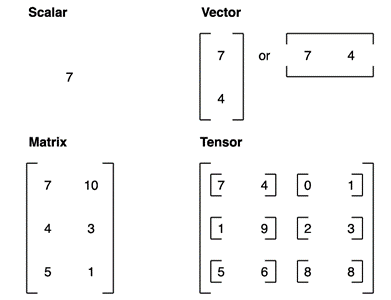

## Creating Tensors with tf.Variable()
Anda juga dapat (meskipun kemungkinan jarang Anda lakukan, karena seringkali, saat bekerja dengan data, tensors dibuat untuk Anda secara otomatis) membuat tensors menggunakan `tf.Variable()`.

Perbedaan antara `tf.Variable()` dan `tf.constant()` adalah tensors yang dibuat dengan `tf.constant()` bersifat tidak berubah (tidak bisa diubah, hanya dapat digunakan untuk membuat tensor baru), sedangkan, tensors yang dibuat dengan `tf.Variable()` bersifat dapat diubah (dapat diubah).

In [ ]:
# Buat tensor yang sama pakai tf.variable dan tf.constant()
change_tensor = tf.Variable([10, 7])
unchange_tensor = tf.constant([10, 7])
change_tensor, unchange_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

Now let's try to change one of the elements of the changable tensor.

In [ ]:
# Tensor tidak seperti array bisa diganti valuenya dengan mencari alamat valuenya
change_tensor[0] = 7
change_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# Harus pakai .assign() untuk merubah value tensor
change_tensor[0].assign(7)
change_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Now let's try to change a value in a tf.constant() tensor.

In [ ]:
# Gagal karena value dari tensor tf.constant tidak bisa diubah
unchange_tensor[0].assign(7)
unchange_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

Anda harus menggunakan `tf.constant()` jika Anda ingin membuat tensor yang tidak berubah, dan `tf.Variable()` jika Anda memerlukan tensor yang dapat diubah. Namun, dalam banyak kasus, TensorFlow akan memilih secara otomatis untuk Anda (saat memuat data atau memodelkan data).

## Creating random tensors
Tensors acak adalah tensors dari beberapa ukuran yang mengandung angka-angka acak.

Mengapa Anda ingin membuat tensors acak?

Ini digunakan oleh jaringan saraf untuk menginisialisasi bobot (pola) yang mereka coba pelajari dalam data.

Sebagai contoh, proses pembelajaran jaringan saraf sering melibatkan mengambil array angka acak n-dimensi dan menyempurnakannya hingga mewakili suatu pola (cara yang terkompresi untuk mewakili data asli).

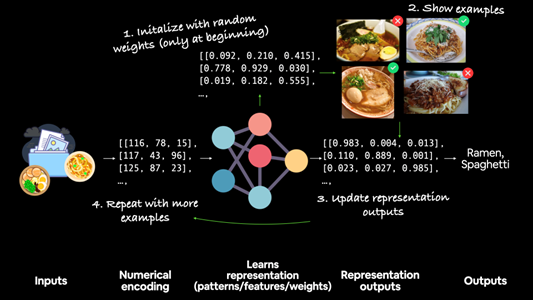


Sebuah jaringan belajar dengan memulai dengan pola acak, kemudian melalui contoh-contoh demonstratif dari data sambil mencoba memperbarui pola acaknya untuk merepresentasikan contoh-contoh tersebut.

Kita dapat membuat tensors acak dengan menggunakan kelas `tf.random.Generator`.

In [ ]:
# Buat 2 tensor random
random1 = tf.random.Generator.from_seed(42) #from_seed agar pola acaknya tetap sama
random1 = random1.normal(shape=(3,2)) #tensor dengan distribusi normal
random2 = tf.random.Generator.from_seed(42)
random2 = random2.normal(shape=(3,2))

# Apa sama?
random1, random2, random1 == random2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)


Ketika kita mengatur sebuah seed, kita memberikan instruksi kepada komputer untuk membuat serangkaian angka acak yang "beraroma" X. Artinya, dengan seed yang sama, kita akan selalu mendapatkan rangkaian angka acak yang sama. Namun, ketika kita mengubah seed, kita memberikan instruksi kepada komputer untuk membuat serangkaian angka acak yang *beraroma* yang berbeda.

Jadi, ketika kita mengubah seed, kita akan mendapatkan serangkaian angka acak yang berbeda pula. Ini seperti memberikan *flavor* yang berbeda pada proses penciptaan angka acak.

In [ ]:
random3 = tf.random.Generator.from_seed(42)
random3 = random3.normal(shape=(3,2))
random4 = tf.random.Generator.from_seed(11)
random4 = random4.normal(shape=(3,2))

random3, random4, random3 == random4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.27305737, -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.28291714]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)


Jika Anda ingin mengacak urutan sebuah tensor, Anda dapat melakukannya dengan menggunakan fungsi `tf.random.shuffle()`. Mengapa Anda ingin melakukan hal ini?

Misalnya, Anda bekerja dengan 15.000 gambar kucing dan anjing, dan 10.000 gambar pertama adalah kucing, sedangkan 5.000 gambar berikutnya adalah anjing. Urutan ini dapat memengaruhi bagaimana jaringan saraf belajar (mungkin akan overfit dengan mempelajari urutan data). Sebagai gantinya, mungkin ide yang baik untuk mengacak data Anda sehingga kucing dan anjing muncul secara acak di seluruh dataset, sehingga jaringan saraf tidak akan mempelajari pola urutan tersebut.

In [ ]:
# acak urutan tensor
tensor = tf.constant([[10, 7],
                      [3, 4],
                      [2, 5]])

tf.random.shuffle(tensor)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

In [ ]:
# parameter seed membantu agar acaknya tetap sama terus
tf.random.shuffle(tensor, seed=1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

Penyebab angka-angka tidak sama adalah karena aturan keempat dalam dokumentasi `tf.random.set_seed()`:

>"Jika kedua seed global dan operasi diatur: Kedua seed digunakan bersama-sama untuk menentukan urutan acak."

`tf.random.set_seed(42)` menetapkan seed global, dan parameter seed dalam `tf.random.shuffle(seed=42)` menetapkan seed operasi.

Karena "Operasi yang bergantung pada seed acak sebenarnya mendapatkan seed dari dua seed: seed global dan seed tingkat operasi. Ini menetapkan seed global."

In [ ]:
# Buat dengan 2 seed (global & lokal)

# Global seed
tf.random.set_seed(42)

# Operation seed
tf.random.shuffle(tensor, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Global seed
tf.random.set_seed(42)

# Operation seed
tf.random.shuffle(tensor)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

## Other ways to make tensors

Meskipun Anda mungkin jarang menggunakannya (ingat, banyak operasi tensor dilakukan di belakang layar untuk Anda), Anda dapat menggunakan tf.ones() untuk membuat tensor yang berisi semua nilai satu dan tf.zeros() untuk membuat tensor yang berisi semua nilai nol.

In [ ]:
# Buat tensor semua valuenya 1 (default valuenya float32)
tf.ones(shape=(2,2), dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [ ]:
# Buat tensor semua valuenya 0
tf.zeros(shape=(2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>


Anda juga dapat mengubah array NumPy menjadi tensors.

Ingat, perbedaan utama antara tensors dan array NumPy adalah bahwa tensors dapat dijalankan pada GPU.

>🔑 Catatan: Sebuah matriks atau tensor biasanya direpresentasikan dengan huruf besar (misalnya `X` atau `A`), sedangkan sebuah vektor biasanya direpresentasikan dengan huruf kecil (misalnya `y` atau `b`).

In [ ]:
import numpy as np
numpyA = np.arange(1, 25, dtype=np.int32) #Buat NumPy array antara 1 dan 25 (24 value)
A = tf.constant(numpyA, shape=[2,4,3]) #shape total harus sama dengan numpyA (2*4*3 = 24 value)
numpyA, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

## Getting information from tensors (shape, rank, size)


Ada saat-saat di mana Anda akan ingin mendapatkan berbagai informasi dari tensors Anda, terutama, Anda harus mengetahui kosakata tensor berikut:

* Bentuk (Shape): Panjang (jumlah elemen) dari setiap dimensi dari sebuah tensor.
* Peringkat (Rank): Jumlah dimensi tensor. Sebuah skalar memiliki peringkat 0, sebuah vektor memiliki peringkat 1, sebuah matriks memiliki peringkat 2, sebuah tensor memiliki peringkat n.
* Sumbu atau Dimensi (Axis or Dimension): Dimensi tertentu dari sebuah tensor.
* Ukuran (Size): Jumlah total item dalam tensor tersebut.

Anda akan menggunakan ini terutama ketika Anda mencoba untuk menyesuaikan bentuk data Anda dengan bentuk model Anda. Misalnya, memastikan bahwa bentuk tensor gambar Anda adalah sama dengan bentuk lapisan input model Anda.

Kita telah melihat salah satunya sebelumnya menggunakan atribut ndim. Mari kita lihat yang lainnya.

In [ ]:
# Buat tensor rank 4
rank_4 = tf.zeros([2,3,4,5])
rank_4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4.shape, rank_4.ndim, tf.size(rank_4)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Fetch semua beberapa atribut
print("Datatype setial element: ", rank_4.dtype)
print("Number of dimensions (rank): ", rank_4.ndim)
print("Shape of tensor: ", rank_4.shape)
print("Elements along axis 0 of tensor: ", rank_4.shape[0])
print("Elements along last axis of tensor: ", rank_4.shape[-1])
print("Total number of elements (2*3*4*5): ", tf.size(rank_4).numpy())


Datatype setial element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along axis 0 of tensor:  2
Elements along last axis of tensor:  5
Total number of elements (2*3*4*5):  120


Anda juga dapat mengindeks tensors seperti halnya dengan list Python.

In [ ]:
rank_4[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [76]:
rank_4[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [88]:
# Buat tensor 2D
rank_2 = tf.constant([[10, 7, 2],
                     [3, 5, 9]])

rank_2[:, -1] # value terakhir di setiap elemen

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 9], dtype=int32)>

Anda juga dapat menambah dimensi pada tensor Anda sambil tetap mempertahankan informasi yang sama menggunakan `tf.newaxis`.

In [89]:
# Tambah ekstra dimensi (di akhir)
rank_3 = rank_2[..., tf.newaxis]
rank_2, rank_3

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10,  7,  2],
        [ 3,  5,  9]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
 array([[[10],
         [ 7],
         [ 2]],
 
        [[ 3],
         [ 5],
         [ 9]]], dtype=int32)>)

Anda juga dapat mencapai hal yang sama menggunakan `tf.expand_dims()`.

In [92]:
tf.expand_dims(rank_2, axis=2)

<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[10],
        [ 7],
        [ 2]],

       [[ 3],
        [ 5],
        [ 9]]], dtype=int32)>

## Manipulating tensors (tensor operations)
Menemukan pola dalam tensors (representasi numerik data) memerlukan manipulasi mereka.

Sekali lagi, ketika membangun model di TensorFlow, sebagian besar dari penemuan pola ini dilakukan untuk Anda.

### Basic operations
Anda dapat melakukan banyak operasi matematika dasar langsung pada tensors menggunakan operator Python seperti `+`, `-`, `*`.

In [93]:
# penjumlahan tensor
tensor = tf.constant([[10, 7],
                     [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

Karena kita menggunakan tf.constant(), tensor asli tidak berubah (penambahan dilakukan pada salinan).

In [94]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

Operator lain juga berfungsi.

In [95]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [96]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

Anda juga dapat menggunakan fungsi TensorFlow yang setara. Menggunakan fungsi TensorFlow (jika memungkinkan) akan membuat proses lebih cepat saat dijalankan sebagai bagian dari graf TensorFlow.

In [97]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [98]:
# tensor awalnya tidak berubah karena kita membuat tensornya pakai tf.constant()
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

### Matrix multiplication
Salah satu operasi yang paling umum dalam algoritma pembelajaran mesin adalah perkalian matriks.

TensorFlow mengimplementasikan fungsionalitas perkalian matriks ini dalam metode `tf.matmul()`.

Dua aturan utama untuk perkalian matriks yang perlu diingat adalah:

1. Dimensi dalam harus sama:
* `(3, 5) @ (3, 5)` tidak akan bisa
* `(5, 3) @ (3, 5)` bisa
* `(3, 5) @ (5, 3)` bisa

2. Matrix hasil akan memiliki dimensi sama seperti dimensi matrix yang dikalikan
* `(5, 3) @ (3, 5)` -> `(5, 5)`
* `(3, 5) @ (5, 3)` -> `(3, 3)`

In [99]:
# Perkalian matrix di TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [100]:
# Perkalian matrix dengan operator dari Python '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Kedua contoh tersebut berhasil karena variabel tensor kita memiliki bentuk (2, 2).

Bagaimana jika kita membuat beberapa tensor yang memiliki bentuk yang tidak sesuai?

In [101]:
# Buat tensor (3,2)
X = tf.constant([[1, 2],
                [3, 4],
                [5, 6]])

# Buat tensor (3, 2) lagi
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

X, Y


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [102]:
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

Mencoba mengalikan dua tensor dengan bentuk `(3, 2)` menghasilkan error karena dimensi dalam tidak cocok.

Kita perlu melakukan salah satu dari hal berikut:

1. Mereshape X menjadi `(2, 3)` sehingga menjadi `(2, 3) @ (3, 2)`.
2. Mereshape Y menjadi `(3, 2)` sehingga menjadi `(3, 2) @ (2, 3)`.

Kita bisa melakukannya dengan menggunakan:

1. `tf.reshape()` - memungkinkan kita untuk mereshape sebuah tensor menjadi bentuk yang ditentukan.
2. `tf.transpose()` - mengubah dimensi dari sebuah tensor yang diberikan.

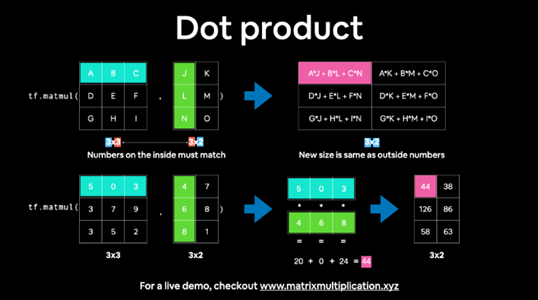

Ayo coba `tf.reshape()` dulu.

In [103]:
# Reshape (3,2) -> (2,3)
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [105]:
# Coba sekarang kalikan X & Y
X @ tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Itu berhasil, mari kita coba yang sama dengan `X` yang sudah diubah bentuk, tetapi kali ini kita akan menggunakan `tf.transpose()` dan `tf.matmul()`.

In [108]:
# Coba transpose (3, 2) -> (2, 3)
tf.transpose(Y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  9, 11],
       [ 8, 10, 12]], dtype=int32)>

In [109]:
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Perhatikan perbedaan dalam bentuk hasil saat mentransposisi `X` atau mereshape `Y`.

Hal ini disebabkan oleh aturan kedua yang disebutkan di atas:

* `(3, 2) @ (2, 3)` -> `(3, 3)` dilakukan dengan `X @ tf.reshape(Y, shape=(2, 3))`
* `(2, 3) @ (3, 2)` -> `(2, 2)` dilakukan dengan `tf.matmul(tf.transpose(X), Y)`

Manipulasi data semacam ini adalah pengingat: Anda akan menghabiskan banyak waktu dalam pembelajaran mesin dan bekerja dengan jaringan saraf untuk mereshape data (dalam bentuk tensors) untuk mempersiapkannya agar bisa digunakan dengan berbagai operasi (seperti memberikannya ke model).

### The dot product
Mengalikan matriks satu dengan yang lain juga disebut sebagai dot product.

Anda dapat melakukan operasi `tf.matmul()` menggunakan `tf.tensordot()`.

In [110]:
# Lakukan dot product pada X dan Y (dengan X sudah tertranspose)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Anda mungkin perhatikan bahwa meskipun menggunakan baik `reshape` maupun `transpose` berhasil, Anda mendapatkan hasil yang berbeda saat menggunakan masing-masing.

Mari kita lihat contoh, pertama dengan `tf.transpose()` kemudian dengan `tf.reshape()`.

In [111]:
# Lakukan perkalian matrix X dan Y (Y tertranspose)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [112]:
tf.matmul(X, tf.reshape(Y, (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Hmm... mereka menghasilkan nilai yang berbeda.

Hal ini aneh karena ketika berurusan dengan `Y` (matriks `(3x2)`), mereshape menjadi `(2, 3)` dan mentransposenya menghasilkan bentuk yang sama.

In [113]:
# Cek shape Y, reshape Y dan transposed Y
Y.shape, tf.reshape(Y, (2,3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

Tapi memanggil tf.reshape() dan tf.transpose() pada Y tidak selalu menghasilkan nilai yang sama.

In [115]:
# Cek value Y, reshape Y, dan transpose Y
print("Normal Y:")
print(Y, "\n")

print("Y reshape to (2,3): ")
print(tf.reshape(Y, (2,3)), "\n")

print("Y transpose to (2,3): ")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshape to (2,3): 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transpose to (2,3): 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


Seperti yang Anda lihat, output dari `tf.reshape()` dan `tf.transpose()` ketika dipanggil pada Y, meskipun memiliki bentuk yang sama, berbeda.

Ini dapat dijelaskan oleh perilaku default dari setiap metode:

* `tf.reshape()` - mengubah bentuk tensor yang diberikan (pertama) dan kemudian memasukkan nilai sesuai dengan urutan mereka muncul (dalam kasus kita, 7, 8, 9, 10, 11, 12).
* `tf.transpose()` - menukar urutan sumbu, secara default sumbu terakhir menjadi yang pertama, namun urutan dapat diubah menggunakan parameter perm.

Jadi yang mana yang sebaiknya Anda gunakan?

Sekali lagi, sebagian besar waktu operasi-operasi ini (ketika mereka perlu dijalankan, seperti selama pelatihan jaringan saraf) akan diimplementasikan untuk Anda.

Tetapi umumnya, ketika melakukan perkalian matriks dan bentuk dua matriks tidak sesuai, Anda akan mentranspos (bukan mereshape) salah satunya untuk menyelaraskan mereka.

### Matrix multiplication tidbits
* Jika kita mentranspos `Y`, itu akan direpresentasikan sebagai `Y^T` (catatan huruf T kapital untuk tranpose).
* Anda dapat melihat gambaran ilustratif tentang perkalian matriks oleh [Math is Fun](https://www.mathsisfun.com/algebra/matrix-multiplying.html).
* Coba demo langsung perkalian matriks: [http://matrixmultiplication.xyz/](http://matrixmultiplication.xyz/)

### Changing the datatype of a tensor
Terkadang Anda ingin mengubah tipe data default dari tensor Anda.

Ini umum ketika Anda ingin melakukan komputasi dengan presisi yang lebih rendah (misalnya, menggunakan bilangan pecahan 16-bit daripada bilangan pecahan 32-bit).

Menghitung dengan presisi yang lebih rendah berguna pada perangkat dengan kapasitas komputasi yang lebih sedikit seperti perangkat mobile (karena semakin sedikit bit, semakin sedikit ruang yang dibutuhkan untuk komputasi).

Anda dapat mengubah tipe data dari sebuah tensor menggunakan `tf.cast()`.

In [116]:
# Buat tensor baru dengan default datatype (float32)
B = tf.constant([1.7, 7.4])

# Buat tensor baru dengan default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [117]:
# Ubah dari float32 ke float 16 (menurunkan presisi)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [118]:
# Ubah dari int32 ke float32
C = tf.cast(C, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

### Getting the absolute value
Terkadang Anda ingin mendapatkan nilai absolut (semua nilai positif) dari elemen-elemen dalam tensor Anda.

Untuk melakukannya, Anda dapat menggunakan `tf.abs()`.

In [120]:
# Buat tensor dengan nilai negatif
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [121]:
# Cari absolut valuenya
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Finding the min, max, mean, sum (aggregation)
Anda dapat dengan cepat mengagregasi (melakukan perhitungan pada seluruh tensor) tensor untuk menemukan hal-hal seperti nilai minimum, nilai maksimum, rata-rata, dan jumlah dari semua elemen.

Untuk melakukannya, metode agregasi biasanya memiliki sintaks `reduce()_[aksi]`, seperti:

* `tf.reduce_min()` - mencari nilai minimum dalam sebuah tensor.
* `tf.reduce_max()` - mencari nilai maksimum dalam sebuah tensor (berguna ketika Anda ingin menemukan probabilitas prediksi tertinggi).
* `tf.reduce_mean()` - mencari rata-rata dari semua elemen dalam sebuah tensor.
* `tf.reduce_sum()` - mencari jumlah dari semua elemen dalam sebuah tensor.

**Catatan:** biasanya, setiap metode ini berada di bawah modul `math`, misalnya `tf.math.reduce_min()`, tetapi Anda bisa menggunakan alias `tf.reduce_min()`.

Mari kita lihat mereka dalam tindakan.

In [122]:
# Buat tensor berisi 50 value dan random 0 ke 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([89,  7, 93, 32, 50, 64, 13, 70, 29, 66, 96, 81, 98, 95, 32, 52,  6,
       67, 10,  2, 60, 66, 78, 59, 22, 49, 65, 42,  7, 46, 12, 32, 42, 65,
       91, 81,  1, 19,  3,  0, 45, 91, 63,  4, 32, 41,  9, 53, 40, 44])>

In [123]:
# Cari minimumnya
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [125]:
# Cari maksimumnya
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [126]:
# Cari mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=46>

In [128]:
# Cari totalnya
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2314>

Anda juga dapat menemukan standar deviasi (`tf.reduce_std()`) dan varians (`tf.reduce_variance()`) dari elemen-elemen dalam sebuah tensor menggunakan metode serupa.

### Finding the positional maximum and minimum
Bagaimana cara menemukan posisi sebuah tensor di mana nilai maksimum terjadi?

Hal ini berguna ketika Anda ingin menyusun label-label Anda (misalnya `['Hijau', 'Biru', 'Merah']`) dengan tensor probabilitas prediksi Anda (misalnya `[0.98, 0.01, 0.01]`).

Dalam kasus ini, label yang diprediksi (yang memiliki probabilitas prediksi tertinggi) akan menjadi `'Hijau'`.

Anda dapat melakukan hal yang sama untuk nilai minimum (jika diperlukan) dengan menggunakan:

* `tf.argmax()` - mencari posisi elemen maksimum dalam sebuah tensor yang diberikan.
* `tf.argmin()` - mencari posisi elemen minimum dalam sebuah tensor yang diberikan.

In [146]:
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.0936658 , 0.23669845, 0.92395537, 0.99777554, 0.29961871,
       0.23531581, 0.52990699, 0.82141136, 0.13360557, 0.95634717,
       0.2346281 , 0.82992844, 0.58441704, 0.30252253, 0.51352986,
       0.49974932, 0.93835687, 0.63091625, 0.52162541, 0.13641015,
       0.44656873, 0.08992451, 0.34008513, 0.50310725, 0.8978559 ,
       0.60449572, 0.32397368, 0.98376508, 0.75275638, 0.16321089,
       0.39169074, 0.93424222, 0.1572353 , 0.59502076, 0.40367896,
       0.05780789, 0.85500999, 0.3844753 , 0.53519565, 0.7570162 ,
       0.95227108, 0.8511564 , 0.17837123, 0.85214364, 0.20234817,
       0.73858907, 0.78625615, 0.85275397, 0.00538648, 0.83142761])>

In [147]:
# Cari posisi elemen maximum F
print(f"Nilai minimum ada di [{tf.argmax(F)}]: {F[tf.argmax(F)]}")

Nilai minimum ada di [3]: 0.9977755420161113


In [148]:
# Cari posisi elemen minimum F
print(f"Nilai minimum ada di [{tf.argmin(F)}]: {F[tf.argmin(F)]}")

Nilai minimum ada di [48]: 0.005386478924951477


### Squeezing a tensor (removing all single dimensions)
Jika Anda perlu menghapus dimensi tunggal dari sebuah tensor (dimensi dengan ukuran 1), Anda dapat menggunakan `tf.squeeze()`.

* `tf.squeeze()` - menghapus semua dimensi dengan ukuran 1 dari sebuah tensor.

In [149]:
# Buat tensor 5D dengan 50 number antara 0 dan 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1,1,1,1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [150]:
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

### One-hot encoding
Jika Anda memiliki sebuah tensor indeks dan ingin mengonversinya menjadi one-hot encoding, Anda dapat menggunakan `tf.one_hot()`.

Anda juga harus menentukan parameter depth (tingkat di mana Anda ingin melakukan one-hot encoding).

`One-hot encoding` adalah teknik yang umum digunakan dalam pemrosesan data kategorikal, di mana setiap kategori direpresentasikan sebagai vektor biner di mana satu elemen berada di posisi yang sesuai dengan indeks kategori, dan nilai lainnya adalah nol.

In [157]:
# Buat list
list = [0, 1, 2, 3]
print(list)

# one hot encode
tf.one_hot(list, depth=4) #depth=4 karena value list ada 4

[0, 1, 2, 3]


<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

Anda juga dapat menentukan nilai untuk `on_value` dan `off_value` daripada menggunakan nilai default `0` dan `1`.

In [158]:
# Menggunakan custom value yang bukan 0 dan 1
tf.one_hot(list, depth=4, on_value="Jagoan", off_value="Pengecut")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Jagoan', b'Pengecut', b'Pengecut', b'Pengecut'],
       [b'Pengecut', b'Jagoan', b'Pengecut', b'Pengecut'],
       [b'Pengecut', b'Pengecut', b'Jagoan', b'Pengecut'],
       [b'Pengecut', b'Pengecut', b'Pengecut', b'Jagoan']], dtype=object)>

### Squaring, log, square root
Banyak operasi matematika umum lainnya yang mungkin ingin Anda lakukan pada suatu saat, mungkin ada.

Mari kita lihat:

* `tf.square()` - mendapatkan kuadrat dari setiap nilai dalam sebuah tensor.
* `tf.sqrt()` - mendapatkan akar kuadrat dari setiap nilai dalam sebuah tensor (catatan: elemennya perlu berupa float atau akan menghasilkan error).
* `tf.math.log()` - mendapatkan logaritma alami dari setiap nilai dalam sebuah tensor (elemen perlu berupa float).

In [159]:
# Buat tensor baru
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [160]:
# kuadratkan
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [162]:
# Ubah H ke float32
H = tf.cast(H, dtype=tf.float32)

# cari akar kuadratnya
tf.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [163]:
# Cari log (inputannya juga harus float)
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Manipulating tf.Variable tensor
Tensor yang dibuat dengan `tf.Variable()` dapat diubah langsung menggunakan metode seperti:

* `.assign()` - mengubah nilai yang berbeda ke indeks tertentu dari sebuah tensor variabel.
* `.add_assign()` - menambahkan nilai ke nilai yang ada dan mengubahnya kembali ke indeks tertentu dari sebuah tensor variabel.

In [164]:
# Buat tensor variable
I = tf.Variable(np.arange(0,5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [167]:
I.assign([0,1,2,3,50])

# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [168]:
#Tambah 10 ke semua elemen
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

In [169]:
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

## Tensors and NumPy
Kita telah melihat beberapa contoh tensor berinteraksi dengan array NumPy, seperti menggunakan array NumPy untuk membuat tensor.

Tensor juga dapat dikonversi menjadi array NumPy menggunakan:

* `np.array()` - lewatkan sebuah tensor untuk mengonversinya menjadi ndarray (tipe data utama NumPy).
* `tensor.numpy()` - panggil pada sebuah tensor untuk mengonversinya menjadi ndarray.

Melakukan ini membantu karena membuat tensor dapat diiterasi serta memungkinkan kita menggunakan salah satu metode NumPy pada mereka.

In [170]:
# Buat tensor dari NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [171]:
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [172]:
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

Secara default, tensors memiliki `dtype=float32`, sedangkan array NumPy memiliki `dtype=float64`.

Hal ini karena jaringan saraf (yang biasanya dibangun dengan TensorFlow) umumnya dapat bekerja dengan sangat baik dengan presisi yang lebih rendah (32-bit daripada 64-bit).

In [176]:
# Buat tensor dari NumPy dan dari array
numpy_J = tf.constant(np.array([3., 7., 10.])) #bakalan jadi float64 (karena numpy)
tensor_J = tf.constant([3., 7., 10.]) #bakalan float32 (karena default TensorFlow)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

##Using @tf.function
Dalam petualangan TensorFlow Anda, Anda mungkin akan menemui fungsi Python yang memiliki dekorator `@tf.function`.

Jika Anda tidak yakin apa yang dilakukan dekorator Python, baca panduan [RealPython](https://realpython.com/primer-on-python-decorators/) tentang mereka.

Tapi singkatnya, dekorator mengubah fungsi dengan cara tertentu.

Dalam kasus dekorator `@tf.function`, itu mengubah fungsi Python menjadi graf TensorFlow yang dapat dipanggil. Ini adalah cara elegan untuk mengatakan, jika Anda telah menulis fungsi Python Anda sendiri, dan Anda mendekorasinya dengan `@tf.function`, ketika Anda mengekspor kode Anda (untuk mungkin dijalankan pada perangkat lain), TensorFlow akan mencoba mengonversinya menjadi versi yang lebih cepat (dengan membuatnya bagian dari graf komputasi).

Untuk informasi lebih lanjut, baca panduan [Better performnace with tf.function](https://www.tensorflow.org/guide/function).

In [179]:
# Buat function sederhana
def function(x, y):
    return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x,y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [180]:
# Buat function yang sama dan decorate dengan tf.function
@tf.function
def tf_function(x, y):
    return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

Jika Anda tidak melihat perbedaan antara kedua fungsi di atas (yang ada `@` dan yang tidak), Anda benar.

Sebagian besar perbedaan terjadi di balik layar. Salah satu yang utama adalah potensi percepatan kode jika memungkinkan.

## Finding access to GPUs
Kita telah menyebutkan GPU berkali-kali dalam notebook ini.

Jadi bagaimana cara memeriksa apakah Anda memiliki satu yang tersedia?

Anda dapat memeriksa apakah Anda memiliki akses ke GPU menggunakan `tf.config.list_physical_devices()`.

In [181]:
print(tf.config.list_physical_devices('GPU'))

[]


Jika hasilnya adalah array kosong (atau tidak ada yang ditampilkan), itu berarti Anda tidak memiliki akses ke GPU (atau setidaknya TensorFlow tidak dapat menemukannya).

Jika Anda menjalankan di Google Colab, Anda dapat mengakses GPU dengan pergi ke Runtime -> *Change Runtime Type* -> *Pilih GPU* (**catatan**: setelah melakukan ini, notebook Anda akan restart dan variabel apa pun yang Anda simpan akan hilang).

Setelah Anda mengubah tipe runtime Anda, jalankan sel di bawah ini.

In [182]:
print(tf.config.list_physical_devices('GPU'))

[]


In [1]:
!nvidia-smi

Tue Feb 20 06:34:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

>🔑 Note: If you have access to a GPU, TensorFlow will automatically use it whenever possible.

#🛠 Exercises
1. Create a vector, scalar, matrix and tensor with values of your choosing using `tf.constant()`.
2. Find the shape, rank and size of the tensors you created in 1.
3. Create two tensors containing random values between 0 and 1 with shape `[5, 300]`.
4. Multiply the two tensors you created in 3 using matrix multiplication.
5. Multiply the two tensors you created in 3 using dot product.
6. Create a tensor with random values between 0 and 1 with shape `[224, 224, 3]`.
7. Find the min and max values of the tensor you created in 6.
8. Created a tensor with random values of shape `[1, 224, 224, 3]` then squeeze it to change the shape to `[224, 224, 3]`.
9. Create a tensor with shape `[10]` using your own choice of values, then find the index which has the maximum value.
10. One-hot encode the tensor you created in 9.